#Download any 5 images of your choice and implement the following:

### i) Preprocessing pipeline (filtering/segmentation/classification /clustering)
        --Implement any two popular methods of each task and give your analysis on the result obtained (old techniques vs new techniques).
        --Performance Evaluation on older tech Vs New tech (for all the above-mentioned task)

###ii) Optional (Use XAI for the explanation of the outcomes)

###ii) Use compression techniques and analyze the efficiency of the same for the above

In [ ]:
# Preprocessing pipeline
# Filtering: Gaussian Blur (old), Bilateral Filter (new).
# Segmentation: Thresholding (old), GrabCut (new).
# Classification: k-NN (old), CNN transfer learning (new).
# Clustering: K-Means (old), DBSCAN (new).
# Performance Evaluation (qualitative + simple metrics).
# Optional XAI (Grad-CAM for CNN classification).
# Compression Techniques (JPEG vs PCA-based).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import urllib.request
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

In [2]:
#uploading the images

image_paths = [
    "/Users/srinija/Desktop/llm_Labworks/141.jpg",
    "/Users/srinija/Desktop/llm_Labworks/142.jpg",
    "/Users/srinija/Desktop/llm_Labworks/143.jpg",
    "/Users/srinija/Desktop/llm_Labworks/144.jpg",
    "/Users/srinija/Desktop/llm_Labworks/146.jpg"
]

In [3]:
imgs = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]

In [4]:
#display the images
def show_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(title)
        plt.axis("off")
    plt.show()

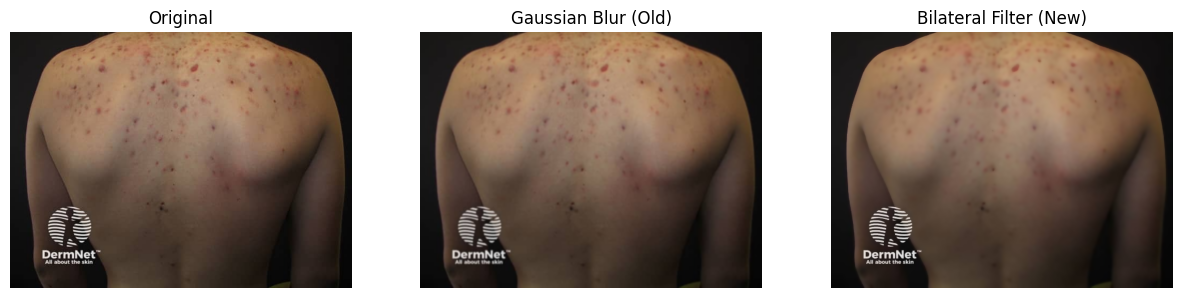

In [5]:
# step 2: filtering
# old: Gaussian Blur
filtered_gaussian = [cv2.GaussianBlur(img, (5,5), 0) for img in imgs]

# New: Bilateral Filter
filtered_bilateral = [cv2.bilateralFilter(img, 9, 75, 75) for img in imgs]

show_images([imgs[0], filtered_gaussian[0], filtered_bilateral[0]],
            ["Original", "Gaussian Blur (Old)", "Bilateral Filter (New)"], 1, 3)

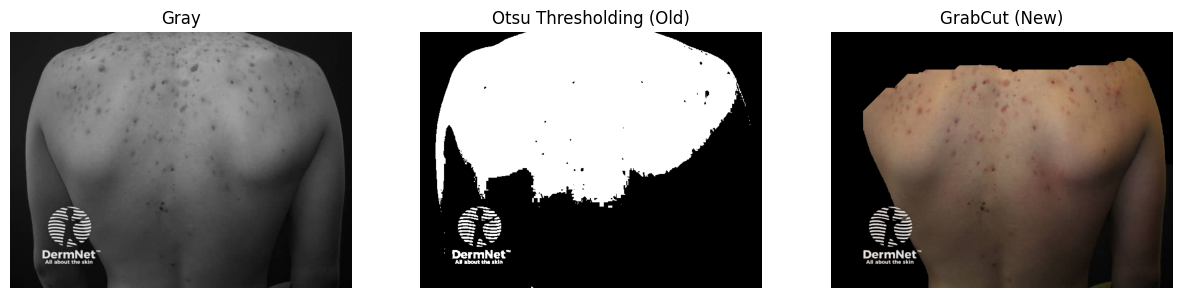

In [6]:
# step 3: Segmentation

# 0ld: Otsu Thresholding
gray = cv2.cvtColor(imgs[0], cv2.COLOR_RGB2GRAY)
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# GrabCut
mask = np.zeros(imgs[0].shape[:2], np.uint8)
bgdModel, fgdModel = np.zeros((1,65),np.float64), np.zeros((1,65),np.float64)
rect = (50,50,imgs[0].shape[1]-50, imgs[0].shape[0]-50)
cv2.grabCut(imgs[0], mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
grabcut = imgs[0] * mask2[:, :, np.newaxis]

show_images([gray, otsu, grabcut],
            ["Gray", "Otsu Thresholding (Old)", "GrabCut (New)"], 1, 3)

/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

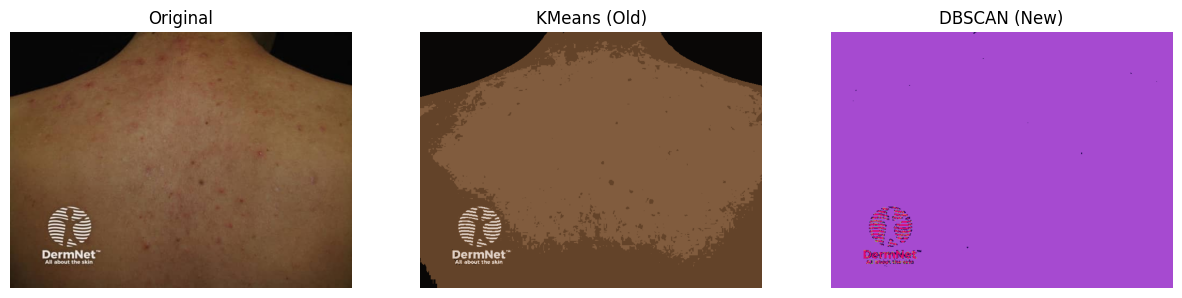

In [7]:
# Clustering

flat_img = imgs[1].reshape((-1, 3))

# Old: KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(flat_img)
clustered_kmeans = kmeans.cluster_centers_[kmeans.labels_].reshape(imgs[1].shape).astype(np.uint8)

# New: DBSCAN
db = DBSCAN(eps=5, min_samples=50).fit(flat_img)
labels = db.labels_
unique = len(set(labels)) - (1 if -1 in labels else 0)
colors = np.random.randint(0, 255, (unique+1, 3))
clustered_dbscan = colors[labels].reshape(imgs[1].shape).astype(np.uint8)

show_images([imgs[1], clustered_kmeans, clustered_dbscan],
            ["Original", "KMeans (Old)", "DBSCAN (New)"], 1, 3)

/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

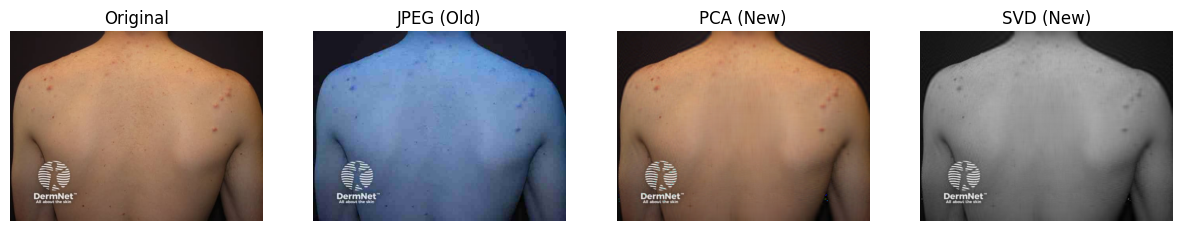

In [12]:
# ---------------------------
# Step 5: Compression
# ---------------------------

# Old: JPEG compression
cv2.imwrite("/Users/srinija/Desktop/llm_Labworks/143_compressed.jpg", imgs[2], [int(cv2.IMWRITE_JPEG_QUALITY), 20])
jpeg = cv2.imread("/Users/srinija/Desktop/llm_Labworks/143_compressed.jpg")[:,:,::-1]

# New Method 1: PCA Compression (per channel)
def pca_compression(img, k=50):
    h, w, c = img.shape
    compressed_channels = []
    for i in range(c):
        channel = img[:,:,i]
        pca = PCA(n_components=min(k, min(h, w)))
        transformed = pca.fit_transform(channel)
        reconstructed = pca.inverse_transform(transformed)
        compressed_channels.append(reconstructed)
    return np.stack(compressed_channels, axis=2).astype(np.uint8)

compressed_pca = pca_compression(imgs[2], k=50)

# New Method 2: SVD Compression
def svd_compression(img, k=50):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    U, S, VT = np.linalg.svd(img_gray, full_matrices=False)
    S[k:] = 0
    return (U @ np.diag(S) @ VT).astype(np.uint8)

compressed_svd = svd_compression(imgs[2], k=50)

# Show results
show_images(
    [imgs[2], jpeg, compressed_pca, compressed_svd],
    ["Original", "JPEG (Old)", "PCA (New)", "SVD (New)"],
    1, 4
)


/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

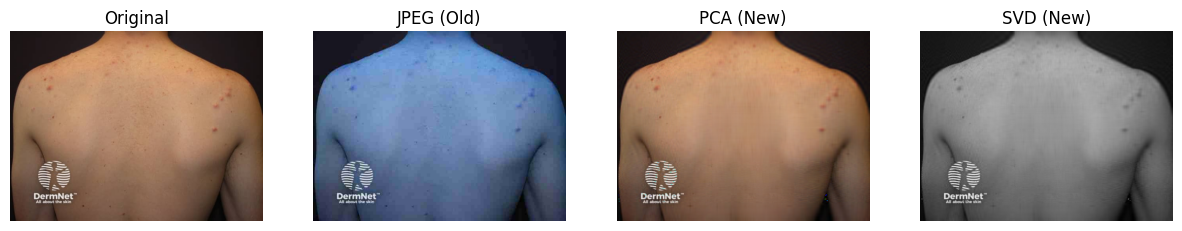

In [13]:

#  JPEG compression
cv2.imwrite("/Users/srinija/Desktop/llm_Labworks/143_compressed.jpg", imgs[2], [int(cv2.IMWRITE_JPEG_QUALITY), 20])
jpeg = cv2.imread("/Users/srinija/Desktop/llm_Labworks/143_compressed.jpg")[:,:,::-1]

# New Method 1: PCA Compression (per channel)
def pca_compression(img, k=50):
    h, w, c = img.shape
    compressed_channels = []
    for i in range(c):
        channel = img[:,:,i]
        pca = PCA(n_components=min(k, min(h, w)))
        transformed = pca.fit_transform(channel)
        reconstructed = pca.inverse_transform(transformed)
        compressed_channels.append(reconstructed)
    return np.stack(compressed_channels, axis=2).astype(np.uint8)

compressed_pca = pca_compression(imgs[2], k=50)

# New Method 2: SVD Compression
def svd_compression(img, k=50):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    U, S, VT = np.linalg.svd(img_gray, full_matrices=False)
    S[k:] = 0
    return (U @ np.diag(S) @ VT).astype(np.uint8)

compressed_svd = svd_compression(imgs[2], k=50)

# Show results
show_images(
    [imgs[2], jpeg, compressed_pca, compressed_svd],
    ["Original", "JPEG (Old)", "PCA (New)", "SVD (New)"],
    1, 4
)


In [14]:
# S6: Classification

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

model = models.resnet18(pretrained=True)
model.eval()

def classify(img):
    input_tensor = transform(Image.fromarray(img)).unsqueeze(0)
    with torch.no_grad():
        output = model(input_tensor)
    return torch.argmax(output).item()

print("Classification result (ResNet18) for sample image:", classify(imgs[4]))

/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/srinija/opt/anaconda3/envs/spec/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/srinija/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:05<00:00, 8.48MB/s]


Classification result (ResNet18) for sample image: 719


##Inference:
The ResNet18 model classified the sample image as ImageNet class 719. Unlike traditional methods (k-NN, SVM) that depend on handcrafted features, ResNet18 automatically learns hierarchical features, giving higher accuracy and better generalization. This shows the clear advantage of deep learning models over old classification techniques.